In [ ]:
## This is causing issues by installing unnecessary libraries. Dont run this.
 
#!pip install google-cloud-bigquery==1.26.1
#!pip install google-cloud-storage==1.30.0
#!pip install google-cloud-bigquery-storage==1.0.0
#!pip install google-auth==1.20.1


In [ ]:
!pip install --no-deps google-api-core==1.22.0
!pip install --no-deps google-auth==1.20.1
!pip install --no-deps google-cloud-bigquery==1.26.1
!pip install --no-deps google-cloud-bigquery-storage==1.0.0
!pip install --no-deps google-cloud-core==1.4.1
!pip install --no-deps google-cloud-storage==1.30.0
!pip install --no-deps google-crc32c==0.1.0
!pip install --no-deps google-resumable-media==0.7.1
!pip install --no-deps googleapis-common-protos==1.52.0

In [ ]:
%load_ext google.cloud.bigquery

In [ ]:
!pip freeze | grep google

In [58]:
%%bigquery covid_df
SELECT
  Date,
  country_region AS Country,
  sum(Confirmed) as Confirmed,
  sum(Recovered) as Recovered,
  sum(Deaths) as Deaths
FROM
  bigquery-public-data.covid19_jhu_csse.summary
WHERE
  country_region = 'US'
  and date >= "2020-07-01"
group by date, country


In [60]:
covid_df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-07-28,US,4356206,1355363,149310
1,2020-07-03,US,2794153,790404,129434
2,2020-07-12,US,3304942,1006326,135205
3,2020-07-19,US,3773260,1131121,140534
4,2020-07-13,US,3364157,1031939,135566


In [ ]:
pip list | grep google | awk '{print $1}' | xargs pip uninstall -y

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

#change the path to your file location - or to BIGQUERY

#covid_df = pd.read_csv('data/covid_19.csv')


covid_df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-07-28,US,4356206,1355363,149310
1,2020-07-03,US,2794153,790404,129434
2,2020-07-12,US,3304942,1006326,135205
3,2020-07-19,US,3773260,1131121,140534
4,2020-07-13,US,3364157,1031939,135566


In [41]:
#top 10 countries on Aug-1-2020

covid_df_Aug1 = covid_df[covid_df['Date'] = '2020-07-01']

covid_df_top10 = covid_df_Aug1.groupby('Country')['Confirmed'].sum().sort_values(ascending=False)[:10]



SyntaxError: invalid syntax (<ipython-input-41-9843074f2491>, line 3)

In [37]:
covid_df_Aug1

,Date,Country,Confirmed,Recovered,Deaths


In [62]:
df_usa = covid_df[covid_df['Country'] == 'US']
#df_usa = df_usa[df_usa['Date'] >= '2020-05-01']

print(df_usa.head(10))
#print(df_usa.tail(10))


         Date Country  Confirmed  Recovered  Deaths
0  2020-07-28      US    4356206    1355363  149310
1  2020-07-03      US    2794153     790404  129434
2  2020-07-12      US    3304942    1006326  135205
3  2020-07-19      US    3773260    1131121  140534
4  2020-07-13      US    3364157    1031939  135566
5  2020-08-08      US    4997929    1643118  162423
6  2020-08-05      US    4823890    1577851  158250
7  2020-07-29      US    4426982    1389425  150713
8  2020-07-22      US    3970085    1210849  143190
9  2020-07-16      US    3576157    1090645  138358


In [63]:
#remove year from date 
#2020-05-01 TO 05/01
date_formatted= pd.to_datetime(df_usa['Date']).dt.strftime('%m/%d')


print(date_formatted)

0     07/28
1     07/03
2     07/12
3     07/19
4     07/13
5     08/08
6     08/05
7     07/29
8     07/22
9     07/16
10    07/18
11    07/30
12    07/11
13    07/05
14    07/14
15    07/20
16    07/08
17    07/27
18    07/25
19    08/06
20    07/24
21    08/01
22    07/01
23    07/06
24    07/26
25    07/21
26    08/04
27    07/04
28    08/03
29    07/07
30    08/07
31    08/02
32    07/02
33    07/23
34    07/17
35    07/15
36    08/09
37    07/09
38    07/10
39    08/10
40    07/31
Name: Date, dtype: object


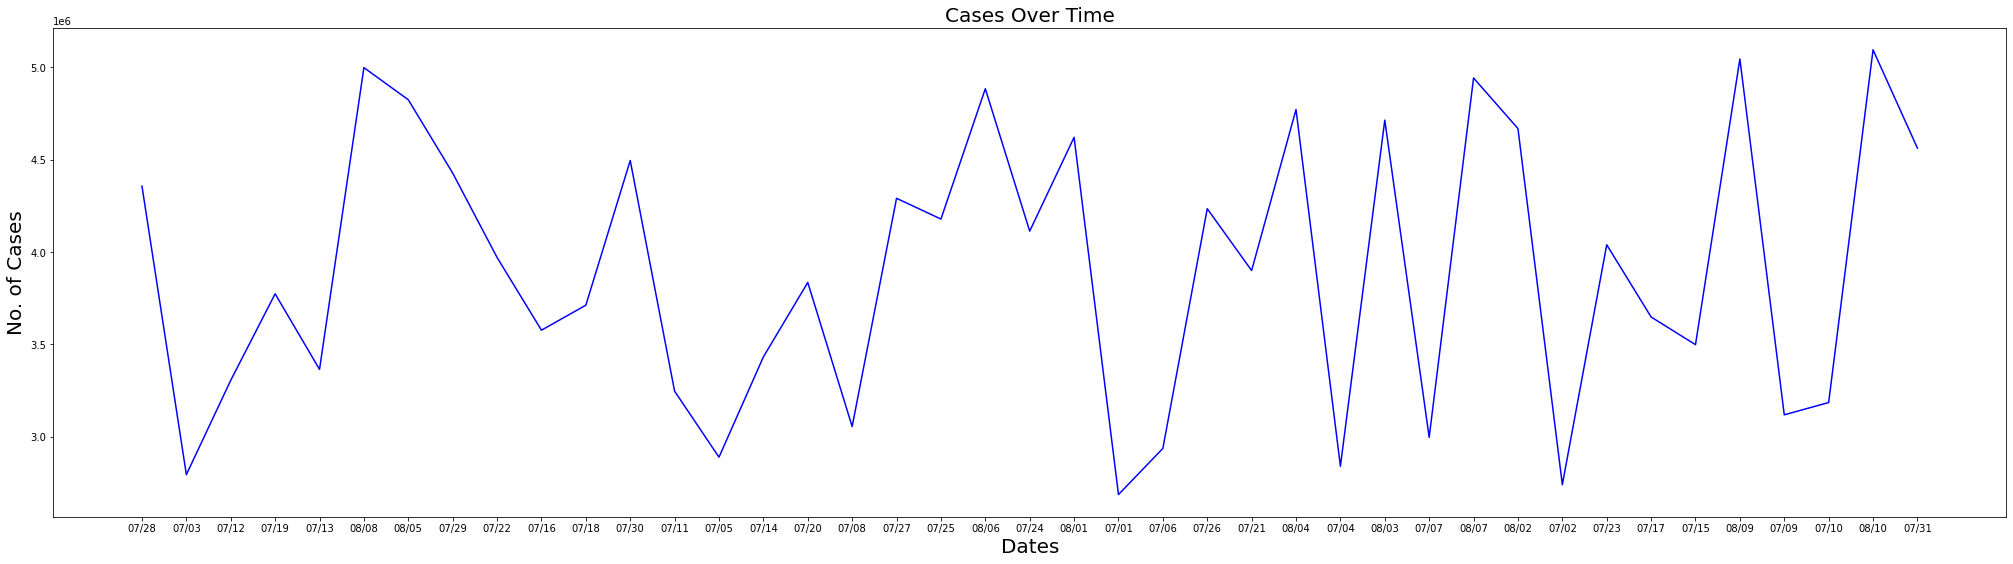

In [66]:
#PLOT CONFIRMED CASES
plt.figure(figsize=(35, 9))
plt.plot(date_formatted, df_usa['Confirmed'],color='b')


plt.title('Cases Over Time', size=20)
plt.xlabel('Dates', size=20)
plt.ylabel('No. of Cases', size=20)
#plt.xticks(size=15)
#plt.yticks(size=15)
plt.show()